In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)

In [3]:
# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

# Clean the above data by removing redundant columns and rows with junk values
# Compare the performance of your model with the decision tree module from scikit learn

C:\Users\1511l\AppData\Local\Temp\ipykernel_28024\2353122325.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None,


PREPROCESSING DATA

In [3]:
display(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [11]:
print(data['origin'].value_counts())
print(data['cylinders'].value_counts())
print(data['model year'].value_counts())

origin
1    249
3     79
2     70
Name: count, dtype: int64
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
model year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64


In [7]:
print(data.count())

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64


In [4]:
data = data.drop(columns=["car name"])

In [5]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.dropna()

In [6]:
clean_data = data.reset_index(drop=True)

In [8]:
display(clean_data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


TRAINING THE IMPLEMENTED DECISION TREE MODEL

In [16]:
shuffled_data = clean_data.sample(frac=1, random_state=42).reset_index(drop=True)
display(shuffled_data)
X = shuffled_data.drop(columns=["mpg"])
y = shuffled_data["mpg"]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,26.0,4,96.0,69.0,2189.0,18.0,72,2
1,21.6,4,121.0,115.0,2795.0,15.7,78,2
2,36.1,4,91.0,60.0,1800.0,16.4,78,3
3,26.0,4,91.0,70.0,1955.0,20.5,71,1
4,27.0,4,140.0,86.0,2790.0,15.6,82,1
...,...,...,...,...,...,...,...,...
387,15.0,8,304.0,150.0,3892.0,12.5,72,1
388,18.0,6,232.0,100.0,2789.0,15.0,73,1
389,23.8,4,151.0,85.0,2855.0,17.6,78,1
390,29.9,4,98.0,65.0,2380.0,20.7,81,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
display(X_train)
print("\nX_test:")
display(X_test)
print("\ny_train:")
display(y_train)
print("\ny_test:")
display(y_test)

X_train:


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
258,4,90.0,71.0,2223.0,16.5,75,2
182,4,151.0,90.0,2950.0,17.3,82,1
172,8,350.0,160.0,4456.0,13.5,72,1
63,4,120.0,88.0,2957.0,17.0,75,2
340,3,80.0,110.0,2720.0,13.5,77,3
...,...,...,...,...,...,...,...
71,8,350.0,175.0,4100.0,13.0,73,1
106,4,81.0,60.0,1760.0,16.1,81,3
270,6,173.0,115.0,2595.0,11.3,79,1
348,8,302.0,140.0,4141.0,14.0,74,1



X_test:


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
78,4,97.0,88.0,2130.0,14.5,70,3
274,8,302.0,140.0,3449.0,10.5,70,1
246,6,258.0,110.0,2962.0,13.5,71,1
55,6,258.0,110.0,3632.0,18.0,74,1
387,8,304.0,150.0,3892.0,12.5,72,1
...,...,...,...,...,...,...,...
361,4,122.0,86.0,2220.0,14.0,71,1
82,8,318.0,150.0,4135.0,13.5,72,1
114,4,86.0,65.0,2019.0,16.4,80,3
3,4,91.0,70.0,1955.0,20.5,71,1



y_train:


258    25.0
182    27.0
172    12.0
63     23.0
340    21.5
       ... 
71     13.0
106    35.1
270    28.8
348    16.0
102    14.0
Name: mpg, Length: 313, dtype: float64


y_test:


78     27.0
274    17.0
246    18.0
55     16.0
387    15.0
       ... 
361    23.0
82     15.0
114    37.2
3      26.0
18     27.4
Name: mpg, Length: 79, dtype: float64

In [23]:
tree = DecisionTree(max_depth=6)  # Split based on MSE
tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
print("\nDECISION TREE PLOT")
tree.plot()
print("RMSE: ", rmse(y_hat, y_test))
print("MAE: ", mae(y_hat, y_test))


DECISION TREE PLOT
?(Xdisplacement > 190.5)
Y:     ?(Xweight > 2217.0)
    Y:         ?(Xmodel year > 77.5)
        Y:             ?(Xweight > 2087.5)
            Y:                 ?(Xhorsepower > 49.0)
                Y:                     Class 26.0
                N:                     ?(Xacceleration > 15.7)
                    Y:                         Class 28.75
                    N:                         Class 32.0
            N:                 ?(Xmodel year > 76.5)
                Y:                     ?(Xacceleration > 16.75)
                    Y:                         Class 27.142857142857142
                    N:                         Class 24.75
                N:                     ?(Xdisplacement > 104.0)
                    Y:                         Class 30.5
                    N:                         Class 30.0
        N:             ?(Xacceleration > 20.45)
            Y:                 ?(Xdisplacement > 87.5)
                Y:                

TRAINING MODEL FROM SCIKIT LEARN

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

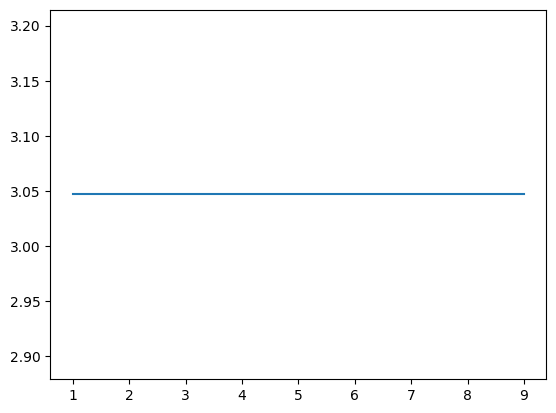

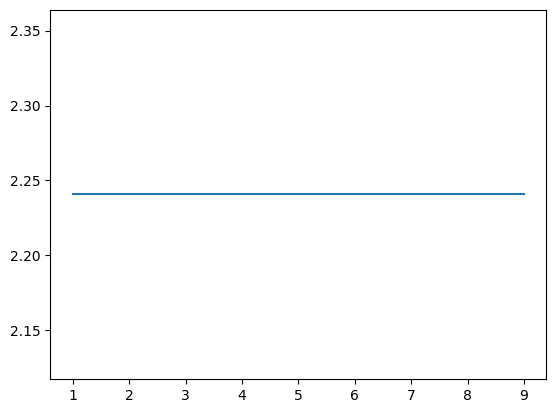

In [24]:
X_arr = np.array(X)
y_arr = np.array(y)
X_train_arr, X_test_arr, y_train_arr, y_test_arr = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

depth_list = []
RMSE_list = []
MAE_list = []
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
for i in range(1,10):
       dt = DecisionTreeRegressor(max_depth=5)
       dt.fit(X_train_arr, y_train_arr)

       y_predict = dt.predict(X_test_arr)
       def mod(x):
              if x>0:
                     return x
              else:
                     return -x
       SE = 0
       AE = 0
       for j in range(len(y_predict)):
              SE += (y_predict[j]-y_test_arr[j])**2
              AE += mod(y_predict[j]-y_test_arr[j])
       depth_list.append(i)
       RMSE_list.append((SE/len(y_predict))**0.5)
       MAE_list.append(AE/len(y_predict))

plt.plot(depth_list, RMSE_list)
plt.show()
plt.plot(depth_list, MAE_list)
plt.show()